## Alunas
> - Laura Ellen Souza Santos - GEC 1657
> - Letícia Moreira Mendes - GEC 1705
> - Lívia Jakclinne Ramos Moreira - GEC 1731 

# Instalando bibliotecas de Fuzzy e MQTT


In [1]:
pip install scikit-fuzzy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install paho-mqtt

Note: you may need to restart the kernel to use updated packages.


# Importando Bibliotecas e Configurando o MQTT Client




In [3]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time
import matplotlib.pyplot as plt 

mqttBroker = "test.mosquitto.org"
client = mqtt.Client("laura-leticia-livia")
client.connect(mqttBroker)

0

# Antecedentes

## Erro


c:\Users\livia\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


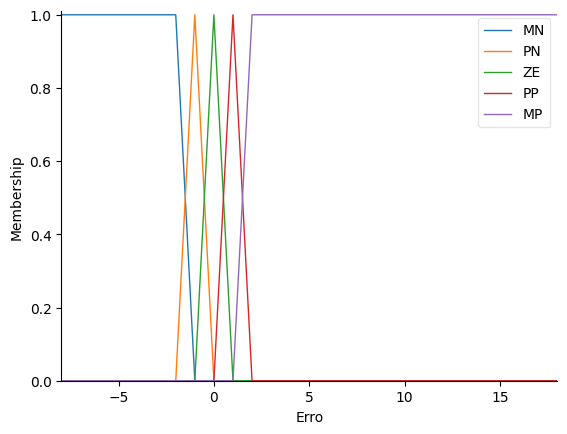

In [4]:
Erro = ctrl.Antecedent(np.arange(-8, 19, 1), 'Erro')

# Plotando o gráfico
Erro['MN'] = fuzz.trapmf(Erro.universe, [-8, -8, -2,-1])
Erro['PN'] = fuzz.trimf(Erro.universe, [-2,-1,0])
Erro['ZE'] = fuzz.trimf(Erro.universe, [-1, 0, 1])
Erro['PP'] = fuzz.trimf(Erro.universe, [0, 1, 2])
Erro['MP'] = fuzz.trapmf(Erro.universe,[1, 2, 18,18])
Erro.view()

## Variação do Erro


In [5]:
VariacaoErro = ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'Variação_Erro')

# Criando o gráfico
VariacaoErro['MN'] = fuzz.trapmf(VariacaoErro.universe, [-2, -2, -0.2,-0.1])
VariacaoErro['PN'] = fuzz.trimf(VariacaoErro.universe, [-0.2,-0.1,0])
VariacaoErro['ZE'] = fuzz.trimf(VariacaoErro.universe, [-0.1, 0, 0.1])
VariacaoErro['PP'] = fuzz.trimf(VariacaoErro.universe, [0, 0.1, 0.2])
VariacaoErro['MP'] = fuzz.trapmf(VariacaoErro.universe,[0.1, 0.2, 2,2])

# Consequente


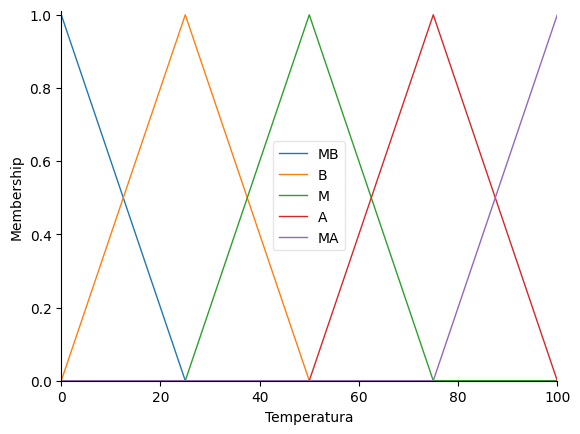

In [6]:
Temperatura = ctrl.Consequent(np.arange(0, 101, 1), 'Temperatura')

Temperatura['MB'] = fuzz.trimf(Temperatura.universe, [0,0,25])
Temperatura['B'] = fuzz.trimf(Temperatura.universe, [0,25,50])
Temperatura['M'] = fuzz.trimf(Temperatura.universe, [25, 50, 75])
Temperatura['A'] = fuzz.trimf(Temperatura.universe, [50, 75, 100])
Temperatura['MA'] = fuzz.trimf(Temperatura.universe, [75, 100, 100])
Temperatura.view()

# Regras de funcionamento


In [7]:
regra1 = ctrl.Rule(Erro['MN']& VariacaoErro['MN'], Temperatura['M'])
regra2 = ctrl.Rule(Erro['PN']& VariacaoErro['MN'], Temperatura['M'])
regra3 = ctrl.Rule(Erro['ZE']& VariacaoErro['MN'], Temperatura['M'])
regra4 = ctrl.Rule(Erro['PP']& VariacaoErro['MN'], Temperatura['M'])
regra5 = ctrl.Rule(Erro['MP']& VariacaoErro['MN'], Temperatura['M'])
regra6 = ctrl.Rule(Erro['MN']& VariacaoErro['PN'], Temperatura['M'])
regra7 = ctrl.Rule(Erro['PN']& VariacaoErro['PN'], Temperatura['M'])
regra8 = ctrl.Rule(Erro['ZE']& VariacaoErro['PN'], Temperatura['M'])
regra9 = ctrl.Rule(Erro['PP']& VariacaoErro['PN'], Temperatura['M'])
regra11 = ctrl.Rule(Erro['MN']& VariacaoErro['ZE'], Temperatura['M'])
regra10 = ctrl.Rule(Erro['MP']& VariacaoErro['PN'], Temperatura['M'])
regra12 = ctrl.Rule(Erro['PN']& VariacaoErro['ZE'], Temperatura['M'])
regra13 = ctrl.Rule(Erro['ZE']& VariacaoErro['ZE'], Temperatura['M'])
regra14 = ctrl.Rule(Erro['PP']& VariacaoErro['ZE'], Temperatura['M'])
regra15 = ctrl.Rule(Erro['MP']& VariacaoErro['ZE'], Temperatura['M'])
regra16 = ctrl.Rule(Erro['MN']& VariacaoErro['PP'], Temperatura['M'])
regra17 = ctrl.Rule(Erro['PN']& VariacaoErro['PP'], Temperatura['M'])
regra18 = ctrl.Rule(Erro['ZE']& VariacaoErro['PP'], Temperatura['M'])
regra19 = ctrl.Rule(Erro['PP']& VariacaoErro['PP'], Temperatura['M'])
regra20 = ctrl.Rule(Erro['MP']& VariacaoErro['PP'], Temperatura['M'])
regra21 = ctrl.Rule(Erro['MN']& VariacaoErro['MP'], Temperatura['M'])
regra22 = ctrl.Rule(Erro['PN']& VariacaoErro['MP'], Temperatura['M'])
regra23 = ctrl.Rule(Erro['ZE']& VariacaoErro['MP'], Temperatura['M'])
regra24 = ctrl.Rule(Erro['PP']& VariacaoErro['MP'], Temperatura['M'])
regra25 = ctrl.Rule(Erro['MP']& VariacaoErro['MP'], Temperatura['M'])

In [8]:
aquecedor_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
controlador = ctrl.ControlSystemSimulation(aquecedor_ctrl)

# Entrada de dados

In [9]:
# Entradas de dados para as operações
print('''   CONTROLE DE TEMPERATURA
            [1] - MANTER TEMPERATURA ALTA (-2°C).
            [2] - MANTER TEMPERATURA MÉDIA (-6°C).
            [3] - MANTER TEMPERATURA BAIXA (-8°C).
            [4] - OUTRA TEMPERATURA. ''')

opcao=-50

while(not(opcao >= 1 and opcao <= 4)):

  opcao = int(input('Escolha uma opção: '))

if(opcao == 1):
  setpoint = -2
elif(opcao == 2):
  setpoint = -6
elif(opcao == 3):
  setpoint = -8
elif(opcao == 4):
  setpoint = int(input('Escolha a temperatura de setpoint: '))

temperaturaAtual = float(input('Entre com a temperatura atual: '))

while(temperaturaAtual < -10 or temperaturaAtual > 10):
    print('A temperatura deve estar de -10°C a 10°C')
    temperaturaAtual = float(input('Entre com a temperatura atual: '))


   CONTROLE DE TEMPERATURA
            [1] - MANTER TEMPERATURA ALTA (-2°C).
            [2] - MANTER TEMPERATURA MÉDIA (-6°C).
            [3] - MANTER TEMPERATURA BAIXA (-8°C).
            [4] - OUTRA TEMPERATURA. 


# Saída


====================== DADOS INSERIDOS ======================
Temperatura Inicial: 5.0 °C
Setpoint: -6.0 °C 

Temperatura atual: 4.9 °C
Temperatura atual: 4.9 °C
Temperatura atual: 4.8 °C
Temperatura atual: 4.8 °C
Temperatura atual: 4.7 °C
Temperatura atual: 4.7 °C
Temperatura atual: 4.7 °C
Temperatura atual: 4.6 °C
Temperatura atual: 4.6 °C
Temperatura atual: 4.6 °C
Temperatura atual: 4.5 °C
Temperatura atual: 4.5 °C
Temperatura atual: 4.5 °C
Temperatura atual: 4.4 °C
Temperatura atual: 4.4 °C
Temperatura atual: 4.4 °C
Temperatura atual: 4.4 °C
Temperatura atual: 4.4 °C
Temperatura atual: 4.3 °C
Temperatura atual: 4.3 °C
Temperatura atual: 4.3 °C
Temperatura atual: 4.3 °C
Temperatura atual: 4.3 °C
Temperatura atual: 4.3 °C
Temperatura atual: 4.3 °C
Temperatura atual: 4.3 °C
Temperatura atual: 4.3 °C
Temperatura atual: 4.2 °C
Temperatura atual: 4.2 °C
Temperatura atual: 4.2 °C


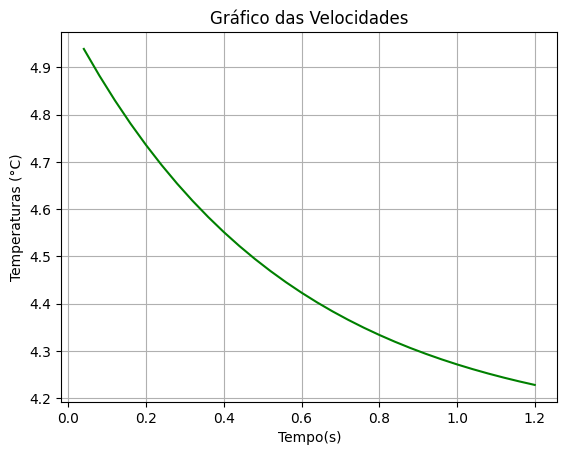

In [10]:
print(f'====================== DADOS INSERIDOS ======================')
print(f'Temperatura Inicial: {temperaturaAtual:.1f} °C')
print(f'Setpoint: {setpoint:.1f} °C \n')
erroAtual = temperaturaAtual - setpoint
ages = []
temps = []

for item in range(30):
    erroAnterior = erroAtual
    erroAtual = temperaturaAtual - setpoint
    varErroVel = erroAtual - erroAnterior
    controlador.input['Erro'] = erroAtual
    controlador.input['Variação_Erro'] = varErroVel
    controlador.compute()

    i = 0
    while i < 15:
        temperaturaAtual = temperaturaAtual * 0.9952 + controlador.output['Temperatura'] * 0.0003963
        time.sleep(0)
        i += 1

    print(f'Temperatura atual: {temperaturaAtual:.1f} °C')
    client.publish("estufa/temp", temperaturaAtual)
    client.publish("estufa/error", erroAtual)
    temps.append(temperaturaAtual)
    ages.append(len(temps) * 0.04)  

# Plotar o gráfico final das velocidades
plt.plot(ages, temps, color = 'green')
plt.xlabel('Tempo(s)')
plt.ylabel('Temperaturas (°C)')
plt.title('Gráfico das Temperaturas')
plt.grid(True)
plt.show()
